In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
tracks_dataset = pd.read_csv("Group_18_data_cleaned.csv") #read the excel file 
tracks_dataset.head()

,oid,timestamp,x,y,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw,other_oid,other_class,other_x,other_y
0,50187,1842.4,495854.6403,5.405751e+06,0.3,-0.71,190.56,-0.25,-1.09,186.37,"[47646, 50181, 50184, 50187]","[0, 4, 4, 4]","[495923.373133135, 495899.069769386, 495899.05...","[5405744.32136751, 5405738.47595118, 5405739.1..."
1,50187,1842.5,495854.7921,5.405751e+06,0.3,-0.71,190.56,-0.25,-1.09,186.37,"[50181, 50187, 50184, 47646]","[4, 4, 4, 0]","[495899.234566716, 495854.792078353, 495899.22...","[5405738.39126416, 5405750.93930797, 5405739.2..."
2,50187,1842.6,495854.9438,5.405751e+06,0.3,-0.71,190.56,-0.25,-1.09,186.37,"[47646, 50187, 50184, 50181]","[0, 4, 4, 4]","[495921.779445452, 495854.943847121, 495899.35...","[5405744.51929698, 5405750.96626812, 5405739.1..."
3,50187,1842.7,495855.0956,5.405751e+06,0.3,-0.71,190.56,-0.25,-1.09,186.37,"[50187, 47646, 50184, 50181]","[4, 0, 4, 4]","[495855.09561589, 495920.943052671, 495899.490...","[5405750.99322827, 5405744.63008031, 5405739.1..."
4,50187,1842.8,495855.2569,5.405751e+06,0.3,-0.71,190.56,-0.25,-1.09,186.37,"[50187, 50184, 50181, 47646]","[4, 4, 4, 0]","[495855.256935427, 495899.585908147, 495899.72...","[5405751.02150176, 5405739.0332702, 5405738.08..."


In [3]:
tracks_dataset.shape

(4759, 14)

In [4]:
X = tracks_dataset[['body_roll','body_pitch','body_yaw','head_roll','head_pitch','head_yaw']]
X

,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw
0,0.3,-0.71,190.56,-0.25,-1.09,186.37
1,0.3,-0.71,190.56,-0.25,-1.09,186.37
2,0.3,-0.71,190.56,-0.25,-1.09,186.37
3,0.3,-0.71,190.56,-0.25,-1.09,186.37
4,0.3,-0.71,190.56,-0.25,-1.09,186.37
...,...,...,...,...,...,...
4754,0.3,-0.71,190.56,-0.25,-1.09,186.37
4755,0.3,-0.71,190.56,-0.25,-1.09,186.37
4756,0.3,-0.71,190.56,-0.25,-1.09,186.37
4757,0.3,-0.71,190.56,-0.25,-1.09,186.37


In [5]:
# MinMaxScaler
min_max_scaler = MinMaxScaler()

X_scaled = pd.DataFrame(min_max_scaler.fit_transform(X))

X_scaled.columns = X.columns

In [6]:
y_scaled = X_scaled['head_yaw']

In [7]:
X_scaled = X_scaled.drop(['head_yaw'],axis=1)

In [8]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=38)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=38)

In [9]:
print(X_train.shape, X_valid.shape, X_test.shape)

(2331, 5) (1000, 5) (1428, 5)


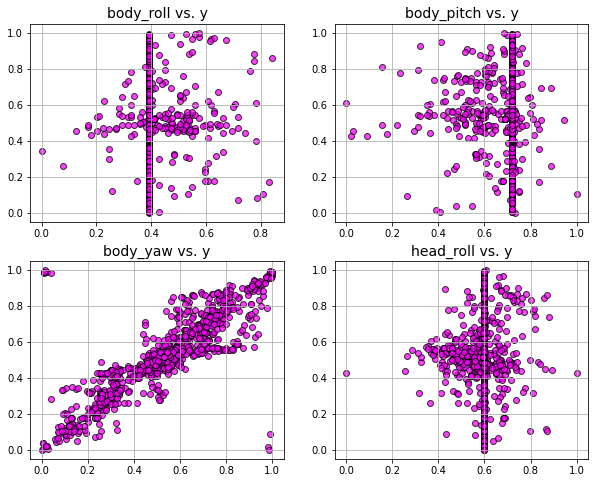

In [10]:
fig,ax = plt.subplots(2,2,figsize=(10,8))
ax = ax.ravel()
for i in range(4):
    ax[i].scatter(X_train[X_train.columns[i]],y_train,edgecolor='k',color='magenta',alpha=0.75)
    ax[i].set_title(f"{X_train.columns[i]} vs. y",fontsize=14)
    ax[i].grid(True)
plt.show()

In [11]:
from sklearn.svm import SVR

svr_linear = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr_linear.fit(X_train, y_train) 

SVR(kernel='linear')

In [12]:
np.round(svr_linear.score(X_test,y_test),4)

0.718

Linear Regressor as a baseline

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
linear = LinearRegression()

In [15]:
linear.fit(X_train,y_train)

LinearRegression()

In [16]:
np.round(linear.score(X_valid,y_valid),4)

0.719

Support vector regressor with Gaussian (radial basis function) kernel

In [17]:
svr_rbf = SVR(kernel='rbf',gamma='scale', C=1.0, epsilon=0.1)
svr_rbf.fit(X_train, y_train) 

SVR()

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
print("RMSE for linear SVR:",np.round(mean_squared_error(y_valid,svr_linear.predict(X_valid)),4))
print("RMSE for RBF kernelized SVR:",np.round(mean_squared_error(y_valid,svr_rbf.predict(X_valid)),4))

RMSE for linear SVR: 0.009
RMSE for RBF kernelized SVR: 0.006


We can do a grid search of hyperparameters (with 5-fold cross-validation) to see if the test/validation score be improved

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
params = {'C':[0.01,0.05,0.1,0.5,1,2,5],'epsilon':[0.1,0.2,0.5,1]}

In [22]:
grid = GridSearchCV(svr_rbf,param_grid=params,cv=5,scoring='r2',verbose=1,return_train_score=True)

In [23]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5],
                         'epsilon': [0.1, 0.2, 0.5, 1]},
             return_train_score=True, scoring='r2', verbose=1)

In [24]:
grid.best_estimator_

SVR(C=0.5)

Fit that estimator to the data and see

In [25]:
svr_best=SVR(kernel='rbf',gamma='scale', C=5.0, epsilon=0.5)
svr_best.fit(X_train, y_train)

SVR(C=5.0, epsilon=0.5)

In [26]:
print("MSE for RBF kernelized SVR:",np.round(mean_squared_error(y_valid,svr_best.predict(X_valid)),4))

MSE for RBF kernelized SVR: 0.022


In [27]:
SVR_Radial_Basis = SVR(kernel="rbf").fit(X_train,y_train)

svr_parameters = {"C": np.arange(0.2,10,0.1)}
svr_cv_model= GridSearchCV(SVR_Radial_Basis,svr_parameters,cv=5).fit(X_train,y_train)

In [28]:
SVR_Radial_Basis

SVR()

In [29]:
y_pred=SVR_Radial_Basis.predict(X_valid)
#Valid Error
np.round(mean_squared_error(y_valid,y_pred),4)

0.006

Got the best results using the model SVR with kernel as rbf and hyperparameters.

In [33]:
import pickle
# open a file, where you ant to store the data
file = open('svm_model.pkl', 'wb')

svm_mse = []
svm_mse.append(np.round(mean_squared_error(y_valid,svr_linear.predict(X_valid)),4))
svm_mse.append(np.round(mean_squared_error(y_valid,svr_rbf.predict(X_valid)),4))
svm_mse.append(np.round(mean_squared_error(y_valid,svr_best.predict(X_valid)),4))

# dump information to that file
pickle.dump(svm_mse, file)